In [1]:
import sys
# add the code path
sys.path.append('..')

In [2]:
%load_ext autoreload
%autoreload 2

## Sample to train Yolo for object detection

In [3]:
from ultrayolo import YoloV3, callbacks
from ultrayolo import datasets
from pathlib import Path
import tensorflow as tf
from ultrayolo import losses
import matplotlib.pyplot as plt

Define the parameters for the run

In [4]:
image_shape = (256,256,3)
batch_shape = 2
max_objects = 100
train_dataset_path = '../tests/data/manifest.txt'
anchors = datasets.load_anchors('../tests/data/yolov3_anchors.txt')
classes = datasets.load_classes('../tests/data/classes.txt')

Create the model

In [5]:
model = YoloV3(image_shape, max_objects, 
               anchors=anchors, num_classes=len(classes), 
               training=True, backbone='MobileNetV2')

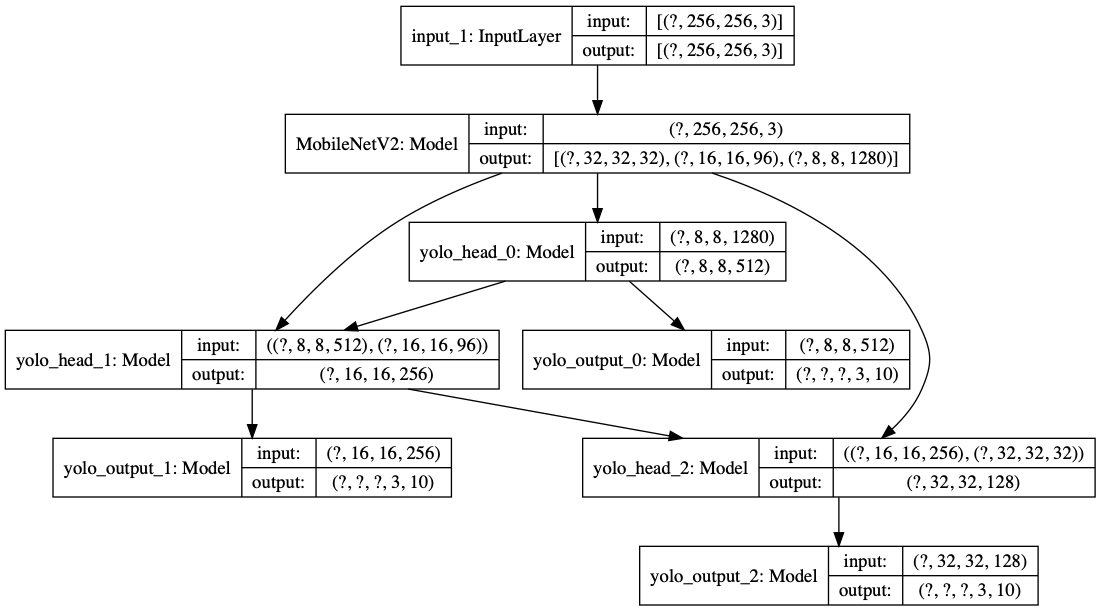

In [6]:
tf.keras.utils.plot_model(model.model, show_shapes=True)

Create the dataset

In [7]:
train_dataset = datasets.YoloDatasetMultiFile(
    train_dataset_path, image_shape, max_objects, batch_shape, 
    model.anchors, model.masks, len(classes)
)

In [8]:
print('num batches', len(train_dataset))

num batches 2


Make optimizer and loss

In [9]:
optimizer = model.get_optimizer('adam', 1e-4)
model_loss = model.get_loss_function(num_batches = len(train_dataset))

  9596 MainThread using adam optimize


In [10]:
model_loss

[yolo_loss_large at 0x15bded350,
 yolo_loss_medium at 0x15bdeddd0,
 yolo_loss_small at 0x15be3a310]

compile the model

In [11]:
model.compile(optimizer, model_loss, run_eagerly=True, summary=False)

Create the callbacks

In [19]:
model_callbacks = callbacks.default_callbacks(model,
    run_path='./checkpoints', lrate_mode='exp_range',
    lrate_value=1e-5, verbose=0)

Set the model in transfer mode

In [20]:
model.set_mode_transfer()

164272 MainThread freeze backbone


In [21]:
history = model.fit(train_dataset, train_dataset, 5, callbacks=model_callbacks)

164428 MainThread training for 5 epochs on the dataset /Users/fumarolaf/git/ultrayolo/notebooks/../tests/data


Train for 2 steps, validate for 2 steps
Epoch 1/5
2/2 [==============================] - 5s 2s/step - loss: 934.6033 - yolo_output_0_loss: 23.9461 - yolo_output_1_loss: 50.1620 - yolo_output_2_loss: 759.6201 - val_loss: 5264.7634 - val_yolo_output_0_loss: 1555.0167 - val_yolo_output_1_loss: 199.1157 - val_yolo_output_2_loss: 3409.6306
Epoch 2/5
2/2 [==============================] - 5s 3s/step - loss: 915.7275 - yolo_output_0_loss: 23.5616 - yolo_output_1_loss: 48.3204 - yolo_output_2_loss: 742.7931 - val_loss: 4735.4019 - val_yolo_output_0_loss: 1105.7004 - val_yolo_output_1_loss: 219.6431 - val_yolo_output_2_loss: 3308.8633
Epoch 3/5
2/2 [==============================] - 5s 2s/step - loss: 890.7028 - yolo_output_0_loss: 22.7319 - yolo_output_1_loss: 45.7045 - yolo_output_2_loss: 721.0179 - val_loss: 4345.3047 - val_yolo_output_0_loss: 814.5522 - val_yolo_output_1_loss: 223.1448 - val_yolo_output_2_loss: 3206.2117
Epoch 4/5
2/2 [==============================] - 5s 3s/step - loss: 85

KeyError: 'val_loss'

## Evaluate model Loss

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Yolo loss for large-sized objects

In [ ]:
loss = history.history['yolo_output_0_loss']
val_loss = history.history['val_yolo_output_0_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss large size object')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss large size object')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Yolo loss for medium-sized objects

In [ ]:
loss = history.history['yolo_output_1_loss']
val_loss = history.history['val_yolo_output_1_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss medium size object')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss medium size object')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Yolo loss for small-sized objects

In [ ]:
loss = history.history['yolo_output_2_loss']
val_loss = history.history['val_yolo_output_2_loss']

epochs = range(1, len(loss) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss small size object')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss small size object')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()